<a href="https://colab.research.google.com/github/mitali-g/MachineLearning/blob/master/Squeeze_Net_Chest_Xray_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Input, GlobalAveragePooling2D, BatchNormalization, concatenate, MaxPool2D
from keras.layers import Dropout, Concatenate, Activation
from keras.layers import Convolution3D, MaxPooling3D, AveragePooling3D
from keras.layers import GlobalMaxPooling3D, GlobalAveragePooling3D
from keras.utils import np_utils
import os, cv2, random
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [2]:
!unzip -q NEW_Resized_Dataset.zip

In [3]:
!ls Resized_Dataset/train-equalized|wc

   5291    5291  137110


In [4]:
dataset = pd.read_csv("Resized_Dataset/Chest_xray_Corona_Metadata.csv")
print(dataset.shape)
dataset[5282:]

(5906, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5282,5309,IM-0021-0001.jpeg,Normal,TEST,NaN,NaN
5283,5310,IM-0019-0001.jpeg,Normal,TEST,NaN,NaN
5284,5311,IM-0017-0001.jpeg,Normal,TEST,NaN,NaN
5285,5312,IM-0016-0001.jpeg,Normal,TEST,NaN,NaN
5286,5313,IM-0015-0001.jpeg,Normal,TEST,NaN,NaN
...,...,...,...,...,...,...
5901,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5902,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5903,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5904,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [5]:
dataset = dataset[['X_ray_image_name', 'Label']]

In [6]:
x_train_features = dataset[['X_ray_image_name']]
x_train_features = x_train_features[0:5282]
#print(x_train_features)

In [7]:
y_train_labels = dataset[['Label']]
y_train_labels = y_train_labels[0:5282]
#print(y_train_labels)

In [8]:
from sklearn.utils import shuffle
train_dataset = dataset[0:5282]
test_dataset = dataset[5282:]

train_dataset = shuffle(train_dataset)
test_dataset = shuffle(test_dataset)

In [9]:
x_train_features = train_dataset['X_ray_image_name']
y_train_labels = train_dataset['Label']

In [10]:
y_train = []
for label in y_train_labels:
  if label == 'Pnemonia':
    y_train.append(1)
  elif label == 'Normal':
    y_train.append(0)
  else:
    print(label)
#print(y_train)
y_train = keras.utils.to_categorical(y_train)
print(y_train)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
x_test_features = dataset[['X_ray_image_name']]
x_test_features = x_test_features[5282:]
#print(x_test_features)

In [12]:
y_test_labels = dataset[['Label']]
y_test_labels = y_test_labels[5282:]
#print(y_test_labels)

x_test_features = test_dataset['X_ray_image_name']
y_test_labels = test_dataset['Label']

In [13]:
import os
list_of_images = os.listdir('Resized_Dataset/train-equalized')
len(list_of_images)

5291

In [14]:
y_test = []
for label in y_test_labels:
  if label == 'Pnemonia':
    y_test.append(1)
  elif label == 'Normal':
    y_test.append(0)
  else:
    print(label)
#print(y_test)
y_test = keras.utils.to_categorical(y_test)
print(y_test)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


5282

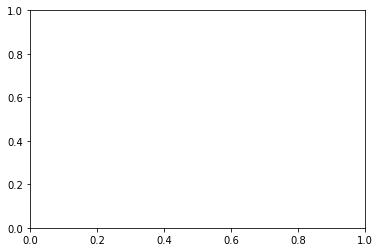

In [15]:
x_train = []
train_path = ('Resized_Dataset/train-equalized/')

for image in x_train_features:
  if ('.jpg' in image) == True:
        image = image[:image.rfind('.jpg')]
  elif ('.jpeg' in image) == True:
        image = image[:image.rfind('.jpeg')]
  elif ('.png' in image) == True:
        image = image[:image.rfind('.png')]
  image_path = train_path + image
  if os.path.isfile(image_path + '.png'):
    image = plt.imread(image_path + '.png')
    plt.grid(False)
    x_train.append(image)
len(x_train)

624

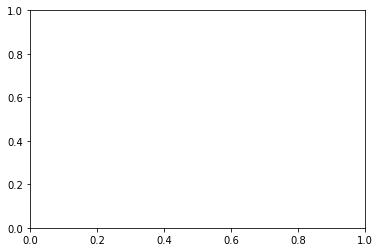

In [16]:
x_test = []

test_path = ('Resized_Dataset/test-equalized/')

for image in x_test_features:
  # image.rfind : removes '.jpeg'
  image_path =test_path + image[:image.rfind('.jpeg')]

  if os.path.isfile(image_path + '.png'):
    image = plt.imread(image_path + '.png')
    plt.grid(False)
    # plt.imshow(image)
    # plt.show()
    x_test.append(image)
len(x_test)

In [17]:
x_train = np.array(x_train, np.float16) / 255.0
y_train = np.array(y_train)
print(len(x_train), len(y_train), x_train.shape, y_train.shape)

x_test = np.array(x_test, np.float16) / 255.0
y_test = np.array(y_test)
print(len(x_test), len(y_test), x_test.shape, y_test.shape)

5282 5282 (5282, 256, 256) (5282, 2)
624 624 (624, 256, 256) (624, 2)


In [18]:
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=0.05, width_shift_range=0.05, height_shift_range=0.05, shear_range=0.05, zoom_range = 0.05, horizontal_flip = True)

datagen.fit(x_train)

In [18]:
# x_train = x_train[:,:,:,np.newaxis]
# x_test = x_test[:,:,:,np.newaxis]

# model = Sequential()

# model.add(Conv2D(filters=96, input_shape=(256, 256, 1), kernel_size=(11, 11), strides=(4, 4), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))

# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))

# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# model.add(Flatten())
# model.add(Dense(4096, input_shape=(224*224*3,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

# model.add(Dense(4096))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

# model.add(Dense(1000))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

# model.add(Dense(2))
# model.add(Activation('softmax'))
# model.summary()

In [21]:
# https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/07_Keras_Flowers_TPU_squeezenet.ipynb
# https://codelabs.developers.google.com/codelabs/keras-flowers-squeezenet/#6 
bnmomentum=0.9
def fire(x, squeeze, expand):
  y = Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x)
  y = BatchNormalization(momentum=bnmomentum)(y)
  y1 = Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y)
  y1 = BatchNormalization(momentum=bnmomentum)(y1)
  y3 = Conv2D(filters=expand//2, kernel_size=3, padding='same', activation='relu')(y)
  y3 = BatchNormalization(momentum=bnmomentum)(y3)
  return concatenate([y1, y3])

def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)
x = Input(shape=[256, 256, 1])
y = fire_module(squeeze=20, expand=80)(x) # squeeze is less than expand
y = fire_module(squeeze=20, expand=80)(y)


y = Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
y = BatchNormalization(momentum=bnmomentum)(y)
y = fire_module(24, 48)(y)
y = MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 96)(y)
y = MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 126)(y)
y = MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 96)(y)
y = MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 48)(y)
y = GlobalAveragePooling2D()(y)
y = Dense(2, activation='softmax')(y)
model = tf.keras.Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 256, 256, 32) 320         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_50 (BatchNo (None, 256, 256, 32) 128         conv2d_50[0][0]                  
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 256, 256, 24) 792         batch_normalization_50[0][0]     
______________________________________________________________________________________________

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

validation_split = 0.25
history = model.fit(datagen.flow(x_train, y_train, batch_size = 16), epochs = 5, shuffle = True)

Epoch 1/5
331/331 [==============================] - 54s 162ms/step - loss: 0.2626 - accuracy: 0.8959
Epoch 2/5
331/331 [==============================] - 53s 161ms/step - loss: 0.1637 - accuracy: 0.9366
Epoch 3/5
331/331 [==============================] - 53s 161ms/step - loss: 0.1441 - accuracy: 0.9447
Epoch 4/5
331/331 [==============================] - 53s 161ms/step - loss: 0.1240 - accuracy: 0.9534
Epoch 5/5
331/331 [==============================] - 53s 161ms/step - loss: 0.1201 - accuracy: 0.9559


In [22]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test)
print(test_loss, test_acc)

20/20 [==============================] - 2s 95ms/step - loss: 0.8289 - accuracy: 0.7772
0.8289310932159424 0.7772436141967773
